# **TITLE:**  Cricket Player Runs Prediction

# Steps:



1.   Data Cleaning
2.   EDA
3.   Feature Engineering
4.   Model Training
5.   Model Evaluation



# Importing libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

# Load Dataset

In [5]:
df = pd.read_csv('newplayer.csv')
print(df.head(n=6))
print(df.shape)

   ID  Player_ID         Player     Country    Opposition Bat1  Runs  BF  \
0   6      49619  Oshane Thomas  WestIndies       v India   0*     0   8   
1  10      49619  Oshane Thomas  WestIndies     v England   1*     1   3   
2  11      49619  Oshane Thomas  WestIndies   v Australia   0*     0   2   
3  12      49619  Oshane Thomas  WestIndies    v Pakistan    0     0   2   
4  14      49619  Oshane Thomas  WestIndies    v Pakistan    0     0   4   
5  15      49619  Oshane Thomas  WestIndies  v Bangladesh    0     0   1   

      SR  4s  6s       Ground   Start Date    Match_ID Team Runs  Target  \
0   0.00   0   0        Dhaka  10 Jan 2010  ODI # 2941       NaN     NaN   
1  33.33   0   0   Nottingham   6 Jul 2011  ODI # 3169       NaN     NaN   
2   0.00   0   0    Pallekele  10 Aug 2011  ODI # 3175       NaN     NaN   
3   0.00   0   0  Dubai (DSC)  11 Nov 2011  ODI # 3212       NaN     NaN   
4   0.00   0   0        Dhaka  15 Mar 2012  ODI # 3260       NaN     NaN   
5   0.00   

# Data cleaning

In [6]:
df.isnull().sum()

,0
ID,0
Player_ID,0
Player,0
Country,0
Opposition,0
Bat1,0
Runs,0
BF,0
SR,0
4s,0


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

,0
ID,0
Player_ID,0
Player,0
Country,0
Opposition,0
Bat1,0
Runs,0
BF,0
SR,0
4s,0


# Exploratory Data Analysis(EDA)

In [9]:
df

,ID,Player_ID,Player,Country,Opposition,Bat1,Runs,BF,SR,4s,6s,Ground,Start Date,Match_ID,Team Runs,Target,Overs,RPO,Inns,Result
7,18,49619,Oshane Thomas,WestIndies,v Pakistan,1*,1,1,100.00,0,0,Sharjah,18 Dec 2013,ODI # 3445,311,323.0,49.4,6.26,2.0,lost
9,27,49619,Oshane Thomas,WestIndies,v England,4*,4,5,80.00,0,0,The Oval,22 May 2014,ODI # 3492,144,226.0,27.5,5.17,2.0,lost
10,30,49619,Oshane Thomas,WestIndies,v New Zealand,0,0,3,0.00,0,0,Dunedin,23 Jan 2015,ODI # 3588,252,361.0,43.4,5.77,2.0,lost
11,31,49619,Oshane Thomas,WestIndies,v New Zealand,3,3,5,60.00,0,0,Dunedin,25 Jan 2015,ODI # 3590,195,316.0,40.3,4.81,2.0,lost
12,32,49619,Oshane Thomas,WestIndies,v New Zealand,7*,7,17,41.17,0,0,Christchurch,14 Feb 2015,ODI # 3599,233,332.0,46.1,5.04,2.0,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,11140,352048,Gulbadin Naib,Afghanistan,v Sri Lanka,4,4,5,80.00,0,0,Abu Dhabi,17 Sep 2018,ODI # 4038,158,250.0,41.2,3.82,2.0,lost
8811,11141,352048,Gulbadin Naib,Afghanistan,v Bangladesh,42*,42,38,110.52,5,0,Abu Dhabi,20 Sep 2018,ODI # 4041,119,256.0,42.1,2.82,2.0,lost
8812,11142,352048,Gulbadin Naib,Afghanistan,v Pakistan,10*,10,7,142.85,1,0,Abu Dhabi,21 Sep 2018,ODI # 4043,258/7,258.0,49.3,5.21,2.0,won
8814,11144,352048,Gulbadin Naib,Afghanistan,v India,15,15,46,32.60,1,0,Dubai (DSC),25 Sep 2018,ODI # 4046,252,253.0,49.5,5.05,2.0,tied


In [10]:
df.describe()

,ID,Player_ID,Runs,BF,SR,4s,6s,Target,Overs,Inns
count,3086.000000,3.086000e+03,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.0
mean,5813.602074,2.539303e+05,30.366818,33.863253,82.964332,2.786455,0.604990,266.442320,42.007323,2.0
std,3153.114936,1.889530e+05,33.430199,32.897672,51.638874,3.384409,1.261252,66.641748,8.760664,0.0
min,18.000000,5.334000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,68.000000,3.200000,2.0
25%,3113.250000,4.975800e+04,6.000000,9.000000,53.330000,0.000000,0.000000,227.000000,39.100000,2.0
50%,5961.500000,2.707495e+05,19.000000,23.000000,80.000000,2.000000,0.000000,270.000000,44.500000,2.0
75%,8329.750000,3.481440e+05,44.000000,49.000000,104.812500,4.000000,1.000000,311.000000,48.500000,2.0
max,11145.000000,1.158100e+06,264.000000,173.000000,460.000000,33.000000,14.000000,445.000000,50.000000,2.0


# Teams which played most matches

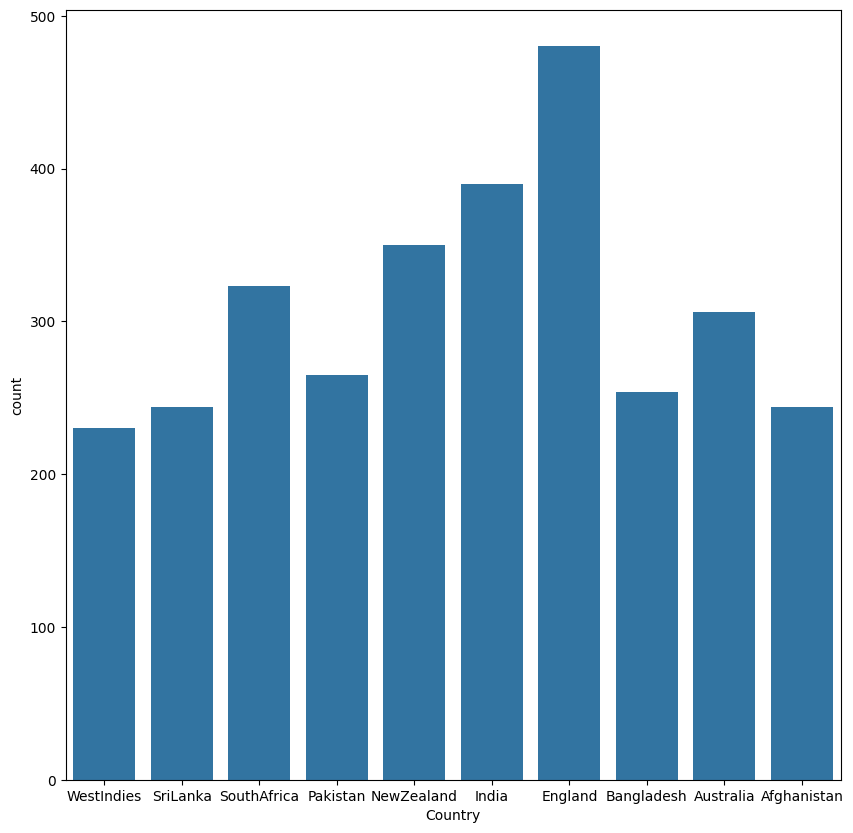

In [11]:
plt.figure(figsize=(10,10))
sea.countplot(x='Country',data=df)
plt.show()

# Result count

<Axes: xlabel='Result', ylabel='count'>

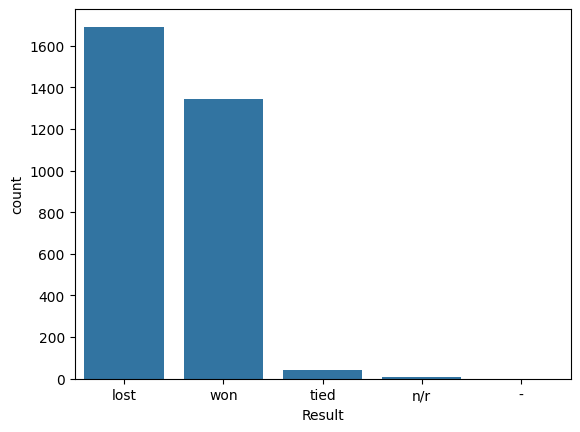

In [12]:
sea.countplot(x='Result', data=df)


In [13]:
new=df.loc[(df['Result']=='lost')& (df['Player']=='Moeen Ali')]
new

,ID,Player_ID,Player,Country,Opposition,Bat1,Runs,BF,SR,4s,6s,Ground,Start Date,Match_ID,Team Runs,Target,Overs,RPO,Inns,Result
5970,7706,8917,Moeen Ali,England,v West Indies,55,55,59,93.22,3,1,North Sound,5 Mar 2014,ODI # 3484,278,304.0,47.4,5.83,2.0,lost
5972,7708,8917,Moeen Ali,England,v India,9,9,8,112.50,2,0,Leeds,5 Sep 2014,ODI # 3525,253,295.0,48.4,5.19,2.0,lost
5984,7720,8917,Moeen Ali,England,v Australia,26,26,30,86.66,5,0,Perth,1 Feb 2015,ODI # 3597,166,279.0,39.1,4.23,2.0,lost
5985,7721,8917,Moeen Ali,England,v Australia,10,10,13,76.92,2,0,Melbourne,14 Feb 2015,ODI # 3600,231,343.0,41.5,5.52,2.0,lost
5989,7725,8917,Moeen Ali,England,v Bangladesh,19,19,21,90.47,3,0,Adelaide,9 Mar 2015,ODI # 3630,260,276.0,48.3,5.36,2.0,lost
5990,7726,8917,Moeen Ali,England,v Australia,17,17,18,94.44,3,0,Southampton,3 Sep 2015,ODI # 3680,246,306.0,45.3,5.4,2.0,lost
5991,7727,8917,Moeen Ali,England,v Australia,8,8,15,53.33,0,0,Lord's,5 Sep 2015,ODI # 3681,245,310.0,42.3,5.76,2.0,lost
5996,7732,8917,Moeen Ali,England,v Pakistan,2*,2,2,100.00,0,0,Abu Dhabi,13 Nov 2015,ODI # 3708,188,284.0,45.5,4.1,2.0,lost
5997,7734,8917,Moeen Ali,England,v Pakistan,4*,4,5,80.00,0,0,Dubai (DSC),20 Nov 2015,ODI # 3712,271,356.0,40.4,6.66,2.0,lost
5998,7735,8917,Moeen Ali,England,v South Africa,19,19,15,126.66,2,1,Bloemfontein,3 Feb 2016,ODI # 3732,250/5,290.0,33.3,7.46,2.0,lost


In [14]:
c=df['Country'].unique()
c

array(['WestIndies', 'SriLanka', 'SouthAfrica', 'Pakistan', 'NewZealand',
       'India', 'England', 'Bangladesh', 'Australia', 'Afghanistan'],
      dtype=object)

In [15]:
v=df.loc[df['Runs'] > 150 ]

arrnp = v['Player'].values

In [16]:
runs = v['Runs'].tolist()
runs

players = v['Player'].tolist()

print(players)

print(runs)

['Chris Gayle ', 'Hashim Amla', 'Hashim Amla', 'Quinton de Kock ', 'Quinton de Kock ', 'Faf du Plessis ', 'Ross Taylor', 'Martin Guptill', 'Rohit Sharma ', 'Rohit Sharma ', 'Rohit Sharma ', 'Virat Kohli ', 'Virat Kohli ', 'Jason Roy', 'Alex Hales', 'David Warner', 'David Warner', 'Steve Smith']
[162, 153, 154, 178, 168, 185, 181, 237, 264, 208, 162, 160, 157, 180, 171, 156, 179, 164]


# Highest run scorer

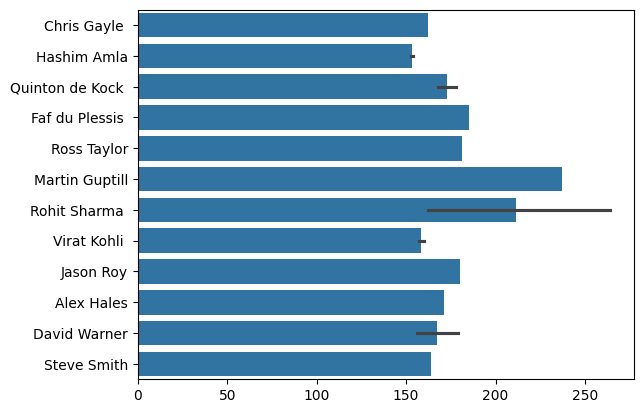

In [17]:
sea.barplot(y=players, x=runs, data=v)
plt.show()


According to the above plot, Martin Guptill is the highest run scorer.


In [18]:
c=df['Country'].unique()
countries =c.tolist()
c

array(['WestIndies', 'SriLanka', 'SouthAfrica', 'Pakistan', 'NewZealand',
       'India', 'England', 'Bangladesh', 'Australia', 'Afghanistan'],
      dtype=object)

# Teams which won most matches

In [19]:

won = df.loc[df['Result']=='won']
wi= df.loc[(df['Result']=='won') & (df['Country']=='WestIndies') ]
sri = df.loc[(df['Result']=='won') & (df['Country']=='SriLanka') ]
south = df.loc[(df['Result']=='won') & (df['Country']=='SouthAfrica') ]
pak = df.loc[(df['Result']=='won') & (df['Country']=='Pakistan') ]
newz = df.loc[(df['Result']=='won') & (df['Country']=='NewZealand') ]
ind = df.loc[(df['Result']=='won') & (df['Country']=='India') ]
eng =  df.loc[(df['Result']=='won') & (df['Country']=='England') ]
bang= df.loc[(df['Result']=='won') & (df['Country']=='Bangladesh') ]
aust = df.loc[(df['Result']=='won') & (df['Country']=='Australia') ]
afgh= df.loc[(df['Result']=='won') & (df['Country']=='Australia') ]


woncount=[wi['Result'].count(),sri['Result'].count(),south['Result'].count(),pak['Result'].count(),\
           newz['Result'].count(),ind['Result'].count(),eng['Result'].count(),bang['Result'].count(),aust['Result'].count(),afgh['Result'].count(),]



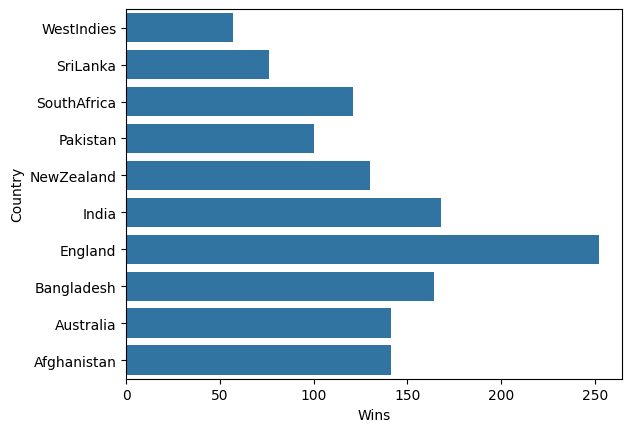

In [20]:
won_counts_df = pd.DataFrame({'Country': countries, 'Wins': woncount})
sea.barplot(x='Wins', y='Country', data=won_counts_df)
plt.show()

# which which lost most matches

In [21]:

lost = df.loc[df['Result']=='lost']
wi= df.loc[(df['Result']=='lost') & (df['Country']=='WestIndies') ]
sri = df.loc[(df['Result']=='lost') & (df['Country']=='SriLanka') ]
south = df.loc[(df['Result']=='lost') & (df['Country']=='SouthAfrica') ]
pak = df.loc[(df['Result']=='lost') & (df['Country']=='Pakistan') ]
newz = df.loc[(df['Result']=='lost') & (df['Country']=='NewZealand') ]
ind = df.loc[(df['Result']=='lost') & (df['Country']=='India') ]
eng =  df.loc[(df['Result']=='lost') & (df['Country']=='England') ]
bang= df.loc[(df['Result']=='lost') & (df['Country']=='Bangladesh') ]
aust = df.loc[(df['Result']=='lost') & (df['Country']=='Australia') ]
afgh= df.loc[(df['Result']=='lost') & (df['Country']=='Australia') ]


lostcount=[wi['Result'].count(),sri['Result'].count(),south['Result'].count(),pak['Result'].count(),\
           newz['Result'].count(),ind['Result'].count(),eng['Result'].count(),bang['Result'].count(),aust['Result'].count(),afgh['Result'].count(),]



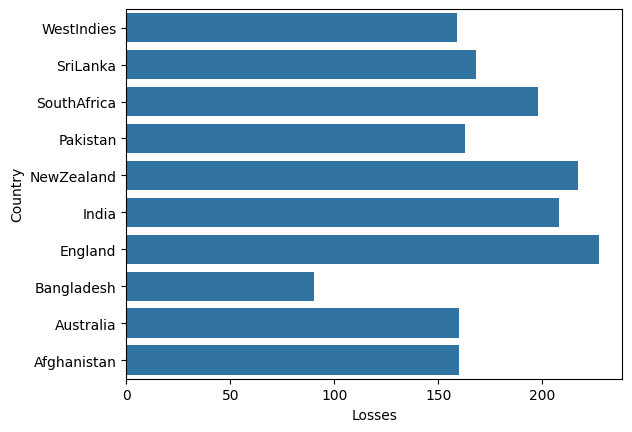

In [22]:
lost_counts_df = pd.DataFrame({'Country': countries, 'Losses': lostcount})
sea.barplot(x='Losses', y='Country', data=lost_counts_df)
plt.show()

 According to the above 3 plots England has played most matches, therefore they have won and lost in the same range.
Other than England, India and Bangladesh has most wins and New Zealand and India has most loses.


In [23]:
valuedf = df

In [24]:
df

,ID,Player_ID,Player,Country,Opposition,Bat1,Runs,BF,SR,4s,6s,Ground,Start Date,Match_ID,Team Runs,Target,Overs,RPO,Inns,Result
7,18,49619,Oshane Thomas,WestIndies,v Pakistan,1*,1,1,100.00,0,0,Sharjah,18 Dec 2013,ODI # 3445,311,323.0,49.4,6.26,2.0,lost
9,27,49619,Oshane Thomas,WestIndies,v England,4*,4,5,80.00,0,0,The Oval,22 May 2014,ODI # 3492,144,226.0,27.5,5.17,2.0,lost
10,30,49619,Oshane Thomas,WestIndies,v New Zealand,0,0,3,0.00,0,0,Dunedin,23 Jan 2015,ODI # 3588,252,361.0,43.4,5.77,2.0,lost
11,31,49619,Oshane Thomas,WestIndies,v New Zealand,3,3,5,60.00,0,0,Dunedin,25 Jan 2015,ODI # 3590,195,316.0,40.3,4.81,2.0,lost
12,32,49619,Oshane Thomas,WestIndies,v New Zealand,7*,7,17,41.17,0,0,Christchurch,14 Feb 2015,ODI # 3599,233,332.0,46.1,5.04,2.0,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,11140,352048,Gulbadin Naib,Afghanistan,v Sri Lanka,4,4,5,80.00,0,0,Abu Dhabi,17 Sep 2018,ODI # 4038,158,250.0,41.2,3.82,2.0,lost
8811,11141,352048,Gulbadin Naib,Afghanistan,v Bangladesh,42*,42,38,110.52,5,0,Abu Dhabi,20 Sep 2018,ODI # 4041,119,256.0,42.1,2.82,2.0,lost
8812,11142,352048,Gulbadin Naib,Afghanistan,v Pakistan,10*,10,7,142.85,1,0,Abu Dhabi,21 Sep 2018,ODI # 4043,258/7,258.0,49.3,5.21,2.0,won
8814,11144,352048,Gulbadin Naib,Afghanistan,v India,15,15,46,32.60,1,0,Dubai (DSC),25 Sep 2018,ODI # 4046,252,253.0,49.5,5.05,2.0,tied


In [25]:
cd =df[['Runs','Target']]
cd.head()

,Runs,Target
7,1,323.0
9,4,226.0
10,0,361.0
11,3,316.0
12,7,332.0


# Features distribution

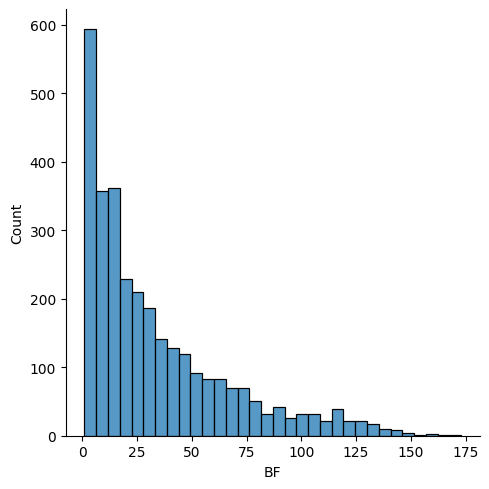

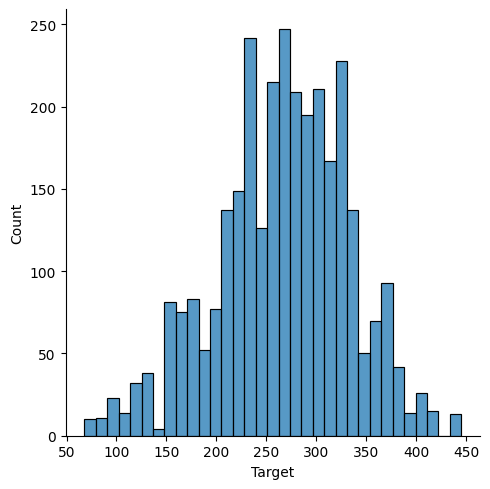

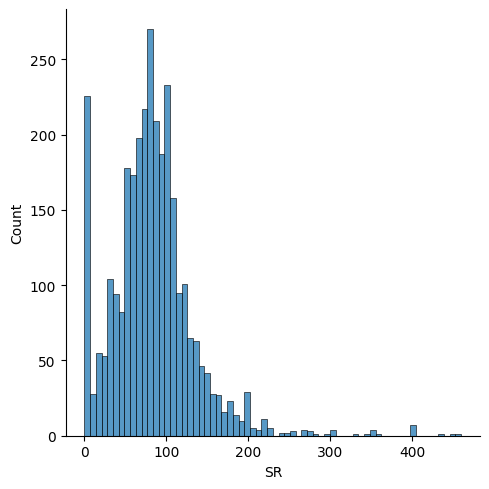

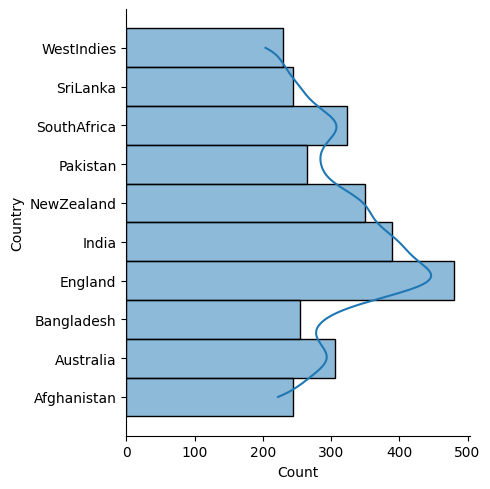

In [26]:
sea.displot(df['BF'])
sea.displot(df['Target'])
sea.displot(df['SR'])
sea.displot(y=df['Country'],kde=True)
plt.show()

In [27]:
new

,ID,Player_ID,Player,Country,Opposition,Bat1,Runs,BF,SR,4s,6s,Ground,Start Date,Match_ID,Team Runs,Target,Overs,RPO,Inns,Result
5970,7706,8917,Moeen Ali,England,v West Indies,55,55,59,93.22,3,1,North Sound,5 Mar 2014,ODI # 3484,278,304.0,47.4,5.83,2.0,lost
5972,7708,8917,Moeen Ali,England,v India,9,9,8,112.50,2,0,Leeds,5 Sep 2014,ODI # 3525,253,295.0,48.4,5.19,2.0,lost
5984,7720,8917,Moeen Ali,England,v Australia,26,26,30,86.66,5,0,Perth,1 Feb 2015,ODI # 3597,166,279.0,39.1,4.23,2.0,lost
5985,7721,8917,Moeen Ali,England,v Australia,10,10,13,76.92,2,0,Melbourne,14 Feb 2015,ODI # 3600,231,343.0,41.5,5.52,2.0,lost
5989,7725,8917,Moeen Ali,England,v Bangladesh,19,19,21,90.47,3,0,Adelaide,9 Mar 2015,ODI # 3630,260,276.0,48.3,5.36,2.0,lost
5990,7726,8917,Moeen Ali,England,v Australia,17,17,18,94.44,3,0,Southampton,3 Sep 2015,ODI # 3680,246,306.0,45.3,5.4,2.0,lost
5991,7727,8917,Moeen Ali,England,v Australia,8,8,15,53.33,0,0,Lord's,5 Sep 2015,ODI # 3681,245,310.0,42.3,5.76,2.0,lost
5996,7732,8917,Moeen Ali,England,v Pakistan,2*,2,2,100.00,0,0,Abu Dhabi,13 Nov 2015,ODI # 3708,188,284.0,45.5,4.1,2.0,lost
5997,7734,8917,Moeen Ali,England,v Pakistan,4*,4,5,80.00,0,0,Dubai (DSC),20 Nov 2015,ODI # 3712,271,356.0,40.4,6.66,2.0,lost
5998,7735,8917,Moeen Ali,England,v South Africa,19,19,15,126.66,2,1,Bloemfontein,3 Feb 2016,ODI # 3732,250/5,290.0,33.3,7.46,2.0,lost


In [28]:
#removing first 5 overs
print("before removal",df.shape)
df = df[df['Overs'] >=5.0]

print("before removal",df.shape)


before removal (3086, 20)
before removal (3080, 20)


In [29]:
#dropping irrelevant columns
print("before dropping",df.shape)
newdf=df.drop(columns=['ID','Country','Bat1','Ground','Start Date','Match_ID'])
print("after dropping",newdf.shape)

before dropping (3080, 20)
after dropping (3080, 14)


In [30]:
newdf['Team Runs'] = newdf['Team Runs'].str.replace('/','.')
# newdf['Team Runs'] = pd.to_numeric(newdf['Team Runs'])
newdup=newdf.copy()
newdf[newdf['Player']=='Virat Kohli ']

,Player_ID,Player,Opposition,Runs,BF,SR,4s,6s,Team Runs,Target,Overs,RPO,Inns,Result
5254,253802,Virat Kohli,v Pakistan,7,17,41.17,1,0,157,168.0,48.5,3.21,2.0,lost
5255,253802,Virat Kohli,v England,15,22,68.18,1,0,316.9,326.0,50.0,6.32,2.0,lost
5257,253802,Virat Kohli,v England,77,79,97.46,9,2,157.3,156.0,28.1,5.57,2.0,won
5258,253802,Virat Kohli,v England,26,33,78.78,3,0,258.5,258.0,47.3,5.43,2.0,won
5260,253802,Virat Kohli,v South Africa,31,41,75.60,2,0,305,332.0,50.0,6.1,2.0,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,253802,Virat Kohli,v Australia,46,62,74.19,3,0,234.3,231.0,49.2,4.74,2.0,won
5377,253802,Virat Kohli,v New Zealand,43,45,95.55,5,0,234,325.0,40.2,5.8,2.0,lost
5379,253802,Virat Kohli,v Australia,44,45,97.77,6,1,240.4,237.0,48.2,4.96,2.0,won
5381,253802,Virat Kohli,v Australia,123,95,129.47,16,1,281,314.0,48.2,5.81,2.0,lost


# heatmap

In [31]:
newdf['Team Runs'] = newdf['Team Runs'].astype(float)
newdf['Inns'] = newdf['Inns'].astype(float)
newdf['RPO'] = newdf['RPO'].astype(float)
newdf.dtypes

,0
Player_ID,int64
Player,object
Opposition,object
Runs,int64
BF,int64
SR,float64
4s,int64
6s,int64
Team Runs,float64
Target,float64


In [32]:
heatdf = newdf[['Runs','BF','SR','4s','6s','Overs','Target','Team Runs','RPO']]

heatdf

,Runs,BF,SR,4s,6s,Overs,Target,Team Runs,RPO
7,1,1,100.00,0,0,49.4,323.0,311.0,6.26
9,4,5,80.00,0,0,27.5,226.0,144.0,5.17
10,0,3,0.00,0,0,43.4,361.0,252.0,5.77
11,3,5,60.00,0,0,40.3,316.0,195.0,4.81
12,7,17,41.17,0,0,46.1,332.0,233.0,5.04
...,...,...,...,...,...,...,...,...,...
8810,4,5,80.00,0,0,41.2,250.0,158.0,3.82
8811,42,38,110.52,5,0,42.1,256.0,119.0,2.82
8812,10,7,142.85,1,0,49.3,258.0,258.7,5.21
8814,15,46,32.60,1,0,49.5,253.0,252.0,5.05


In [33]:
heatdf.dtypes

,0
Runs,int64
BF,int64
SR,float64
4s,int64
6s,int64
Overs,float64
Target,float64
Team Runs,float64
RPO,float64


In [34]:
heatdf.corr()

,Runs,BF,SR,4s,6s,Overs,Target,Team Runs,RPO
Runs,1.000000,0.935235,0.322928,0.903920,0.652761,0.124625,0.202519,0.225487,0.176172
BF,0.935235,1.000000,0.133486,0.809351,0.480938,0.121661,0.106614,0.151285,0.077815
SR,0.322928,0.133486,1.000000,0.338358,0.385539,0.079355,0.204309,0.210656,0.215499
4s,0.903920,0.809351,0.338358,1.000000,0.480360,0.070204,0.165656,0.199016,0.198755
6s,0.652761,0.480938,0.385539,0.480360,1.000000,0.064953,0.202481,0.195296,0.204025
Overs,0.124625,0.121661,0.079355,0.070204,0.064953,1.000000,0.545685,0.755967,-0.047203
Target,0.202519,0.106614,0.204309,0.165656,0.202481,0.545685,1.000000,0.645867,0.253239
Team Runs,0.225487,0.151285,0.210656,0.199016,0.195296,0.755967,0.645867,1.000000,0.583777
RPO,0.176172,0.077815,0.215499,0.198755,0.204025,-0.047203,0.253239,0.583777,1.000000


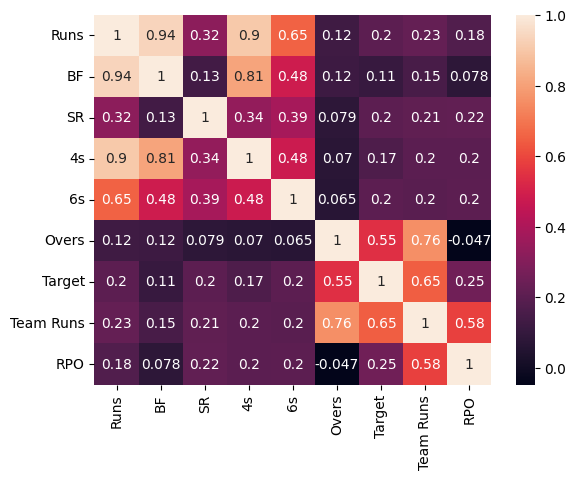

In [35]:
from seaborn import heatmap
heatmap(data=heatdf.corr(),annot=True)
plt.show()


In the above heatmap we get a clear picture of features and its correlations.
and here Runs and BF are closely correlated.
Which means there will be more impact on Runs by the balls faced than other features
Here is a regression  plot of BF and Runs

# Regressionplot

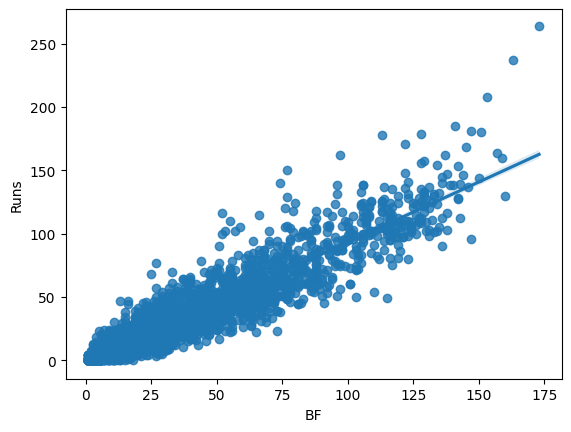

In [36]:
sea.regplot(x=heatdf['BF'],y=heatdf['Runs'],data=heatdf)
plt.show()

# Encoding using dummies

In [37]:
t3newdf=newdf.copy()
t3newdf

,Player_ID,Player,Opposition,Runs,BF,SR,4s,6s,Team Runs,Target,Overs,RPO,Inns,Result
7,49619,Oshane Thomas,v Pakistan,1,1,100.00,0,0,311.0,323.0,49.4,6.26,2.0,lost
9,49619,Oshane Thomas,v England,4,5,80.00,0,0,144.0,226.0,27.5,5.17,2.0,lost
10,49619,Oshane Thomas,v New Zealand,0,3,0.00,0,0,252.0,361.0,43.4,5.77,2.0,lost
11,49619,Oshane Thomas,v New Zealand,3,5,60.00,0,0,195.0,316.0,40.3,4.81,2.0,lost
12,49619,Oshane Thomas,v New Zealand,7,17,41.17,0,0,233.0,332.0,46.1,5.04,2.0,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,352048,Gulbadin Naib,v Sri Lanka,4,5,80.00,0,0,158.0,250.0,41.2,3.82,2.0,lost
8811,352048,Gulbadin Naib,v Bangladesh,42,38,110.52,5,0,119.0,256.0,42.1,2.82,2.0,lost
8812,352048,Gulbadin Naib,v Pakistan,10,7,142.85,1,0,258.7,258.0,49.3,5.21,2.0,won
8814,352048,Gulbadin Naib,v India,15,46,32.60,1,0,252.0,253.0,49.5,5.05,2.0,tied


In [38]:
# pd.get_dummies(t3newdf['Player']).head()
import re

dummies = pd.get_dummies(t3newdf[['Player','Opposition']],prefix='').astype(int)
dummies.rename(columns=lambda x: re.sub(r'_v', '', x), inplace=True)
dummies.rename(columns=lambda y: re.sub(r'_', '', y), inplace=True)
# dummies.rename(columns=lambda x: x.replace('_', ''), inplace=True)
dummies.astype(float)

,Aaron Finch,Abid Ali,Adam Zampa,Adil Rashid,Aftab Alam,Aiden Markram,Alex Carey,Alex Hales,Andile Phehlukwayo,Andre Russell,...,Kenya,New Zealand,P.N.G.,Pakistan,Scotland,South Africa,Sri Lanka,U.A.E.,West Indies,Zimbabwe
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:

mergfile = pd.concat([dummies,t3newdf],axis='columns')
mergfile.describe()

,Aaron Finch,Abid Ali,Adam Zampa,Adil Rashid,Aftab Alam,Aiden Markram,Alex Carey,Alex Hales,Andile Phehlukwayo,Andre Russell,...,Runs,BF,SR,4s,6s,Team Runs,Target,Overs,RPO,Inns
count,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,...,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.0
mean,0.018831,0.000649,0.002273,0.007143,0.000974,0.002273,0.004545,0.012662,0.003896,0.003571,...,30.350649,33.857143,82.938256,2.784091,0.604545,226.957435,266.432143,42.081753,5.374513,2.0
std,0.135951,0.025478,0.047627,0.084227,0.031199,0.047627,0.067278,0.111831,0.062307,0.059664,...,33.431132,32.905610,51.666974,3.385554,1.259757,62.996187,66.688949,8.605127,1.057061,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,51.200000,68.000000,9.500000,2.390000,2.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,9.000000,53.330000,0.000000,0.000000,186.200000,227.000000,39.100000,4.680000,2.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,23.000000,80.000000,2.000000,0.000000,230.800000,270.000000,44.500000,5.300000,2.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,44.000000,49.000000,104.760000,4.000000,1.000000,267.000000,311.000000,48.500000,6.000000,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,264.000000,173.000000,460.000000,33.000000,14.000000,389.000000,445.000000,50.000000,10.130000,2.0


In [40]:
final = mergfile.drop(['Player','Opposition','Result','Inns','4s','6s','Player_ID','SR','RPO','Team Runs','Target'],axis='columns')
final

,Aaron Finch,Abid Ali,Adam Zampa,Adil Rashid,Aftab Alam,Aiden Markram,Alex Carey,Alex Hales,Andile Phehlukwayo,Andre Russell,...,Pakistan,Scotland,South Africa,Sri Lanka,U.A.E.,West Indies,Zimbabwe,Runs,BF,Overs
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,49.4
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,5,27.5
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,43.4
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,5,40.3
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,17,46.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,4,5,41.2
8811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42,38,42.1
8812,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,10,7,49.3
8814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15,46,49.5


In [41]:
final

,Aaron Finch,Abid Ali,Adam Zampa,Adil Rashid,Aftab Alam,Aiden Markram,Alex Carey,Alex Hales,Andile Phehlukwayo,Andre Russell,...,Pakistan,Scotland,South Africa,Sri Lanka,U.A.E.,West Indies,Zimbabwe,Runs,BF,Overs
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,49.4
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,5,27.5
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,43.4
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,5,40.3
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,17,46.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,4,5,41.2
8811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42,38,42.1
8812,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,10,7,49.3
8814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15,46,49.5


In [42]:
demo = final[['Virat Kohli ',' Pakistan','Runs','BF','Overs']]
demo.head(4)

,Virat Kohli,Pakistan,Runs,BF,Overs
7,0,1,1,1,49.4
9,0,0,4,5,27.5
10,0,0,0,3,43.4
11,0,0,3,5,40.3


# Training and Testing Model

Dividing into X and Y variables

In [43]:
from sklearn.model_selection import train_test_split
X= demo.drop(['Runs'],axis=1)
Y = demo['Runs']
train_X, test_X, train_Y,test_Y = train_test_split(X, Y, test_size=0.20, shuffle=True)


In [44]:
comp=dict()

# Prediction

Using various types of regressors to get the best accuracy

# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
li=LinearRegression()
li.fit(test_X,test_Y)

LinearRegression()

In [54]:
li=li.score(test_X,test_Y)
comp['li']=li

# Decision Tree Regressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(test_X,test_Y)


DecisionTreeRegressor()

In [64]:
tree=tree.score(test_X,test_Y)
comp['tree']=tree

# K Neighbors Regressor

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(test_X,test_Y)

KNeighborsRegressor()

In [68]:

knr=knr.score(test_X,test_Y)
comp['knr']=knr

# XGdfegressor

In [69]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(test_X,test_Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [70]:
xgb=xgb.score(test_X,test_Y)
comp['xgb']=xgb

# RandomForestRegressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
fors = RandomForestRegressor()
fors.fit(test_X,test_Y)

RandomForestRegressor()

In [72]:
fors=fors.score(test_X,test_Y)
comp['fors']=fors

# SVR

In [73]:
from sklearn.svm import SVR
sv = SVR()
sv.fit(test_X,test_Y)

SVR()

In [74]:
sv=sv.score(test_X,test_Y)
comp['sv']=sv

# Comparison between Regressors

<BarContainer object of 6 artists>

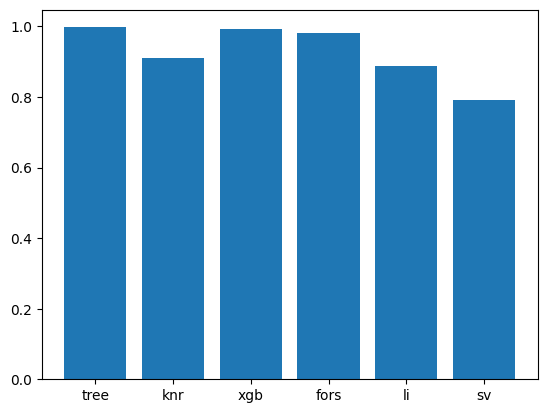

In [57]:
keys = list(comp.keys())
val = list(comp.values())
plt.bar(keys,val)


After comparison between the  regressors , we can see that Decision Tree Regressor is having the highest accuracy,
and which is best for our model. Therefore we choose Decision Tree Regressor

# Selecting Decision Tree Regressor

In [77]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(test_X,test_Y)

DecisionTreeRegressor()

# Predicting Runs of a Specific Player

It can accept player name and opposition and along with it can can accept how many balls a player might face in a certain
over


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

player = input('enter the name:').strip()
opposition = input('enter opposition team:').strip()
bf = float(input('enter balls faced: '))
ov = float(input('enter the overs: '))

# Construct the exact player and opposition column names
player_col = player + ' ' # Assuming a trailing space for players based on previous output
opposition_col = ' ' + opposition # Assuming a leading space for opposition based on previous output

# Check if player and opposition exist as columns
if player_col not in final.columns:
    print(f"Error: Player '{player}' with trailing space not found in the dataset columns. Available players: {player_columns}")
elif opposition_col not in final.columns:
    print(f"Error: Opposition '{opposition}' with leading space not found in the dataset columns. Available oppositions: {opposition_columns}")
else:
    # Create the feature set X and target variable Y dynamically
    X = final[[player_col, opposition_col, 'BF', 'Overs']]
    Y = final['Runs']

    # Split the data into training and testing sets
    train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.20, shuffle=True)

    # Train the model using the dynamically created training data
    tree = DecisionTreeRegressor() # Define the tree model here
    tree.fit(train_X, train_Y)

    # Create input for prediction matching the columns in X
    input_data = pd.DataFrame([[1 if col == player_col else (1 if col == opposition_col else (bf if col == 'BF' else (ov if col == 'Overs' else 0))) for col in X.columns]], columns=X.columns)


    preds = tree.predict(input_data)
    predicted_runs = preds.astype(int).tolist()

    print(player + "'s overall run predicted is", predicted_runs, "Against", opposition)

enter the name:Rohit Sharma
enter opposition team:Pakistan
enter balls faced: 48
enter the overs: 15
Rohit Sharma's overall run predicted is [44] Against Pakistan


# Accuracy

In [89]:
tree.score(test_X,test_Y)

0.7329698392433857

# Conclusion

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate R-squared
r2 = r2_score(test_Y, tree.predict(test_X))
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_Y, tree.predict(test_X))
print(f"MAE: {mae}")

# Calculate Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_Y, tree.predict(test_X)))
print(f"RMSE: {rmse}")

R-squared: 0.7329698392433857
MAE: 10.438157081014223
RMSE: 16.053308971669658
